# Analisis de uso de la plataforma por parte de los usuarios.

---

## Objetivo:

- Cuántas sesiones realizan.
- Qué tan activos son.
- Si existen diferencias entre tipos de usuarios.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
plt.style.use("default")


Carga de datasets.


In [2]:
users = pd.read_csv("../data/raw/users.csv")
sessions = pd.read_csv("../data/raw/sessions.csv")


Revisión de datos de sesiones.

In [3]:
sessions.head()

,session_id,user_id,session_start,duration_sec,pages_viewed,device,traffic_source,primary_action
0,1,30602,2024-04-04 13:53:00,103.0,5.0,desktop,paid_search,add_to_cart
1,2,9439,2024-10-07 00:37:00,379.0,4.0,desktop,organic,add_to_cart
2,3,23658,2024-10-18 13:33:00,222.0,3.0,mobile,paid_social,checkout
3,4,3423,2025-04-15 16:53:00,246.0,7.0,mobile,referral,search
4,5,24425,2024-04-11 03:35:00,924.0,4.0,mobile,organic,add_to_cart


Sesiones por usuario.
Visualización de usuarios más activos.


In [4]:
sessions_per_user = sessions.groupby("user_id").size().reset_index(name="num_sessions")
sessions_per_user.head()

,user_id,num_sessions
0,8,105
1,9,2
2,11,2
3,18,2
4,22,3


Distribución del número de sesiones.


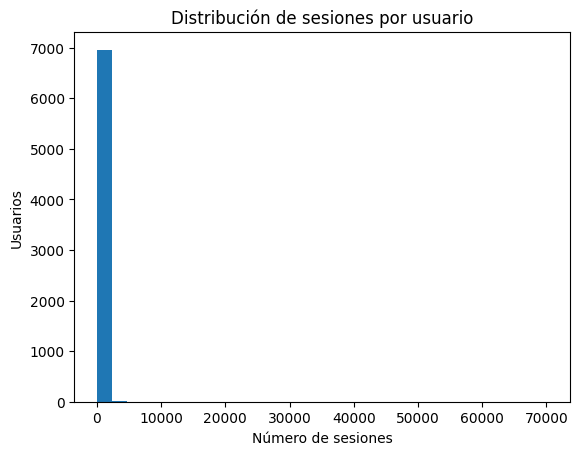

In [5]:
sessions_per_user["num_sessions"].plot(kind="hist", bins=30)
plt.title("Distribución de sesiones por usuario")
plt.xlabel("Número de sesiones")
plt.ylabel("Usuarios")
plt.show()

Unimos información de sesiones con datos del usuario para poder analizar comportamiento por tipo de usuario.

In [6]:
sessions_users = sessions.merge(users, on="user_id", how="left")
sessions_users.head()


,session_id,user_id,session_start,duration_sec,pages_viewed,device,traffic_source,primary_action,signup_date,country,acquisition_channel,utm_campaign,first_device,gender,age,plan,marketing_opt_in,is_churned,churn_date
0,1,30602,2024-04-04 13:53:00,103.0,5.0,desktop,paid_search,add_to_cart,2024-03-28,FR,paid_search,brand,desktop,non_binary,18,free,True,True,2024-08-14
1,2,9439,2024-10-07 00:37:00,379.0,4.0,desktop,organic,add_to_cart,2024-09-04,IT,organic,brand,desktop,male,49,free,True,True,2024-11-24
2,3,23658,2024-10-18 13:33:00,222.0,3.0,mobile,paid_social,checkout,2024-06-25,US,paid_social,retargeting,mobile,male,26,basic,True,True,2024-11-14
3,4,3423,2025-04-15 16:53:00,246.0,7.0,mobile,referral,search,2025-03-05,DE,referral,brand,mobile,male,61,free,True,False,NaN
4,5,24425,2024-04-11 03:35:00,924.0,4.0,mobile,organic,add_to_cart,2024-02-14,CO,organic,NaN,mobile,female,31,free,False,True,2024-04-12


Comparacion de sesiones que generan los distintos planes.

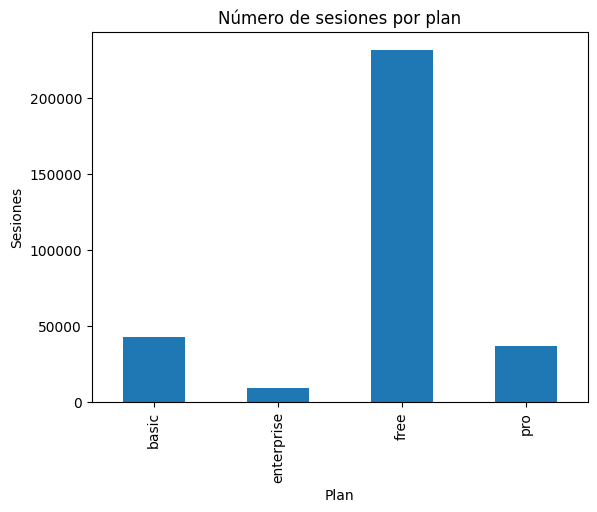

In [7]:
sessions_by_plan = sessions_users.groupby("plan")["session_id"].count()

sessions_by_plan.plot(kind="bar")
plt.title("Número de sesiones por plan")
plt.xlabel("Plan")
plt.ylabel("Sesiones")
plt.show()


Analisis de sesiones de usuarios.


In [8]:
sessions["duration_sec"].describe()

count    319026.000000
mean        301.503185
std         219.158901
min          15.000000
25%         157.000000
50%         244.000000
75%         378.000000
max        5206.000000
Name: duration_sec, dtype: float64

Duración de las sesiones.


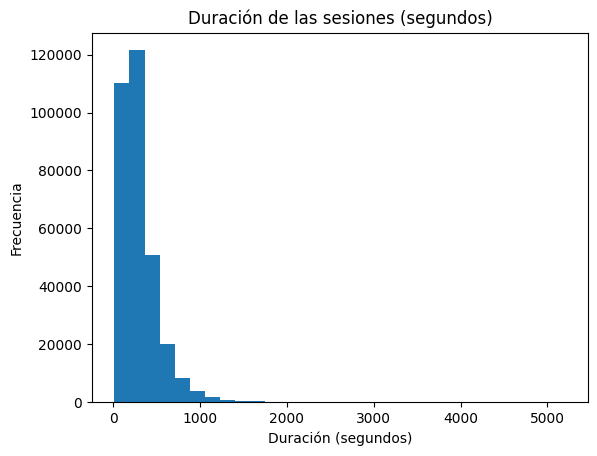

In [9]:
sessions["duration_sec"].plot(kind="hist", bins=30)
plt.title("Duración de las sesiones (segundos)")
plt.xlabel("Duración (segundos)")
plt.ylabel("Frecuencia")
plt.show()

Analisis de actividad diaria en la plataforma.


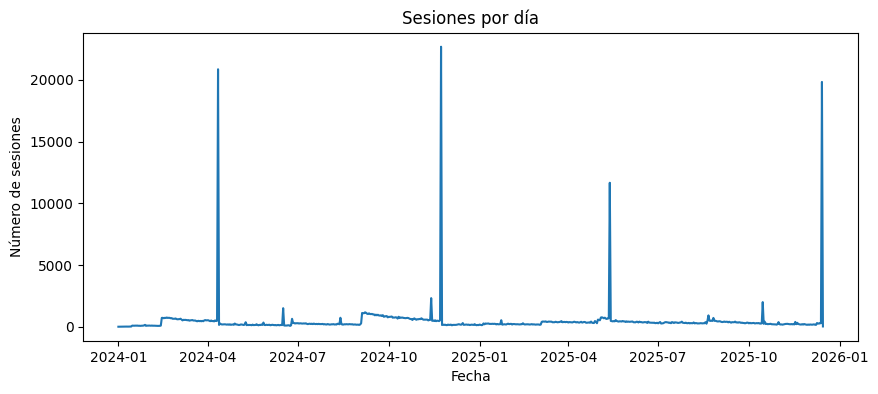

In [10]:
sessions["session_start"] = pd.to_datetime(sessions["session_start"])

sessions_per_day = sessions.groupby(sessions["session_start"].dt.date).size()

sessions_per_day.plot(figsize=(10,4))
plt.title("Sesiones por día")
plt.xlabel("Fecha")
plt.ylabel("Número de sesiones")
plt.show()


Observaciones iniciales:

- Usuarios mucho más activos que otros.
- Algunos planes concentran más actividad.
- La duración de las sesiones varía bastante entre usuarios.
- Existen picos de actividad en determinados días.
